# Versus

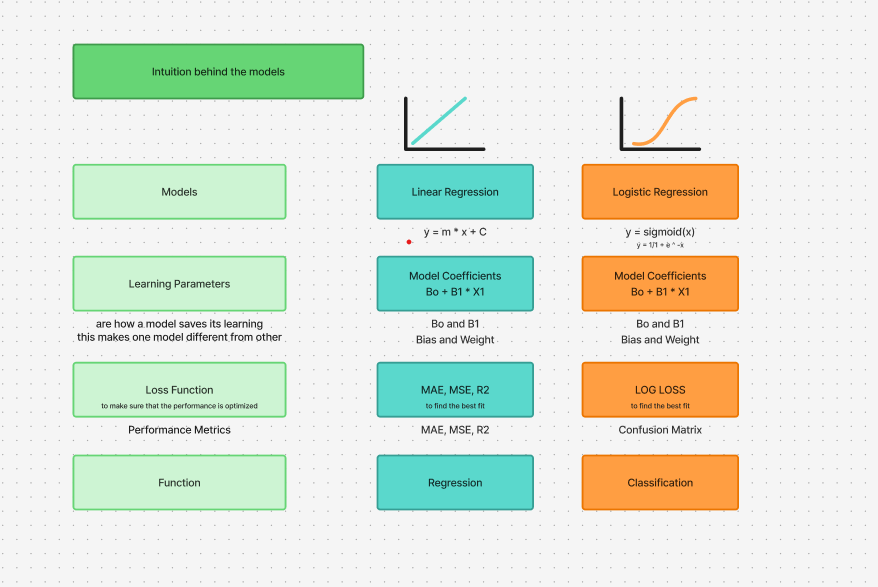

----

# Model Logistic Regression

Loss function = log-loss

- log loss function is depends on Y
- learning parameters = co-efficient = weight and bias w1* x1 + B

Features Engineering: is legit
- the classifier, logistics regression will not accept, contnious value
- we supply categorical value

In [11]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error,r2_score

In [12]:
tips = sns.load_dataset('tips')
df = pd.DataFrame(tips)

In [13]:
x,y =  pd.factorize(df['sex'])
df['sex_factorized'] = x

x,y =  pd.factorize(df['smoker'])
df['smoker_factorized'] = x

x,y =  pd.factorize(df['day'])
df['day_factorized'] = x

x,y =  pd.factorize(df['time'])
df['time_factorized'] = x

In [14]:
x = df[['total_bill',	'size',	'sex_factorized',	'smoker_factorized',	'day_factorized',	'time_factorized']]
y = df["tip"]

In [15]:
x_train = x.loc[:194]
y_train = y.loc[:194]

x_test = x.loc[195:]
y_test = y.loc[195:]

-----

----

In [16]:
pen = sns.load_dataset('penguins')

In [17]:
pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [18]:
sex_codes , sex_names = pd.factorize(pen['sex'], use_na_sentinel= True)         # dia akan assign -1 untuk NaN value
pen['sex_code'] = sex_codes
pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,-1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,-1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1


-----

In [19]:
newtips = sns.load_dataset('tips')

In [20]:
newtips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
smoker_codes, smoker_names = pd.factorize(newtips['smoker'])
newtips['smoker_binary'] = smoker_codes

In [22]:
sex_codes, sex_names = pd.factorize(newtips['smoker'])
newtips['smoker_binary'] = smoker_codes

In [23]:
newtips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [24]:


y = newtips['smoker_binary']
x = newtips[['total_bill']]

from sklearn.linear_model import LinearRegression,LogisticRegression
model_logistic = LogisticRegression()

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [25]:
model_logistic.fit(x_train,y_train)
y_pred = model_logistic.predict(x_test)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [27]:
model_logistic.predict([    [i] for i in range(50)  ])

C:\Users\User\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

accuracy_test = accuracy_score(y_test,y_pred)           #0.61
print(f' The accuracy Score is :/t' ,{accuracy_test} )

confusion_test = confusion_matrix(y_test,y_pred)     #array([[29,   2],
confusion_test                                       #      [ 17,  1]])

class_report = classification_report(y_test,y_pred)
print(class_report)

 The accuracy Score is :/t {0.6122448979591837}
              precision    recall  f1-score   support

           0       0.63      0.94      0.75        31
           1       0.33      0.06      0.10        18

    accuracy                           0.61        49
   macro avg       0.48      0.50      0.42        49
weighted avg       0.52      0.61      0.51        49



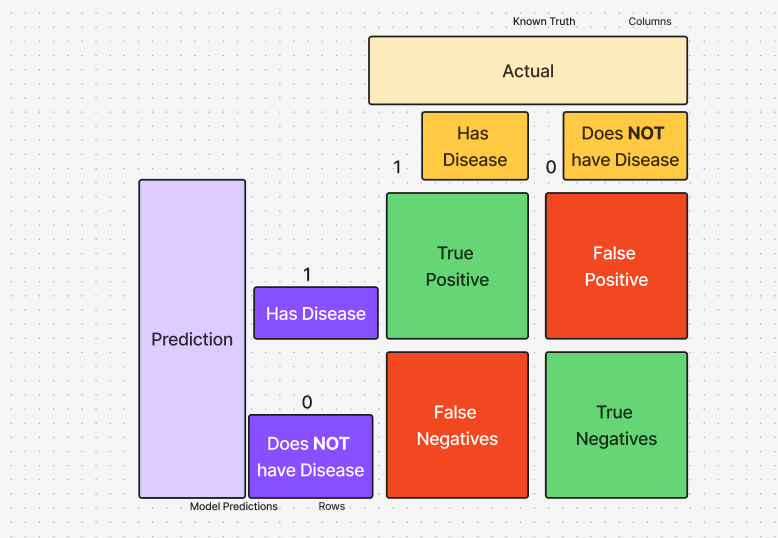

-----

# Formula

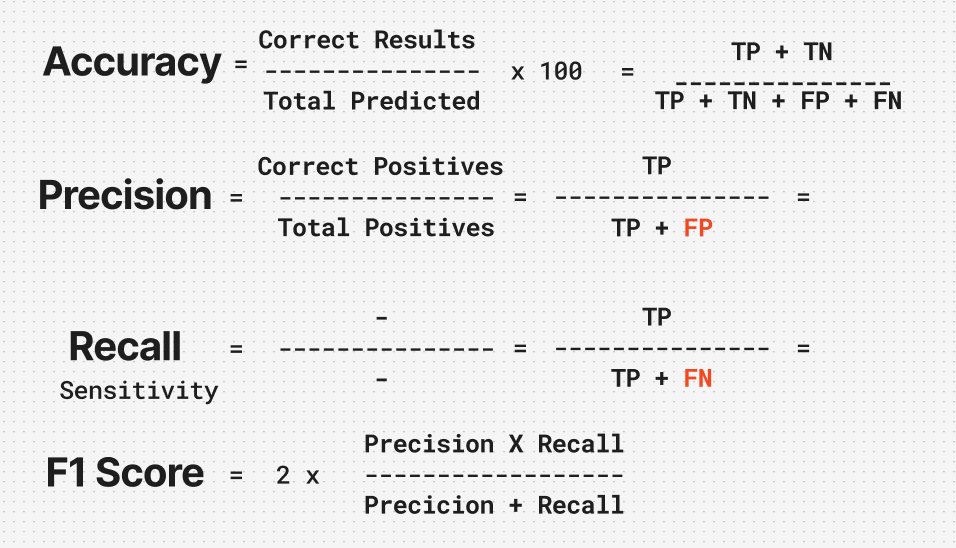

In [29]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression

In [30]:
titanic = sns.load_dataset('titanic')

In [31]:

df = pd.DataFrame(titanic)

In [32]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [34]:
x,y =pd.factorize(df['survived'])
df['survived_code'] = x

In [35]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_code
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [36]:
y = df['survived_code']
x = df[['fare']]

from sklearn.linear_model import LinearRegression,LogisticRegression
model_logistic = LogisticRegression()

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [37]:
model_logistic.fit(x_train,y_train)
y_pred = model_logistic.predict(x_test)

In [38]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [39]:
from sklearn.metrics import mean_absolute_error,r2_score

In [40]:
mae = mean_absolute_error(y_test,y_pred)        # 0.35
mae

0.3463687150837989

In [41]:
r2 = r2_score(y_test,y_pred)            # -0.43
r2

-0.4283140283140283

In [42]:
model_logistic.predict([[70]])

C:\Users\User\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [43]:
model_logistic.predict([    [i] for i in range(90)  ])  #array   ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#        1, 1])

C:\Users\User\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [44]:
new_df = df.dropna(subset=['age'])
new_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_code
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,0
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [45]:
y = new_df['survived_code']
x = new_df[['fare']]

from sklearn.linear_model import LinearRegression,LogisticRegression
model_logistic = LogisticRegression()

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [46]:
model_logistic.fit(x_train,y_train)
y_pred = model_logistic.predict(x_test)

In [47]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(y_test,y_pred)        # 0.34
mae
r2 = r2_score(y_test,y_pred)            # -0.44
r2

-0.4382183908045978

In [49]:
model_logistic.predict([    [i] for i in range(90)  ])

C:\Users\User\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

accuracy_test = accuracy_score(y_test,y_pred)           #0.65
print(f' The accuracy Score is :/t' ,{accuracy_test} )

confusion_test = confusion_matrix(y_test,y_pred)     #array([[100,   5],
confusion_test                                       #    [ 57,  17]])

class_report = classification_report(y_test,y_pred)
print(class_report)

 The accuracy Score is :/t {0.6573426573426573}
              precision    recall  f1-score   support

           0       0.65      0.95      0.77        87
           1       0.73      0.20      0.31        56

    accuracy                           0.66       143
   macro avg       0.69      0.58      0.54       143
weighted avg       0.68      0.66      0.59       143



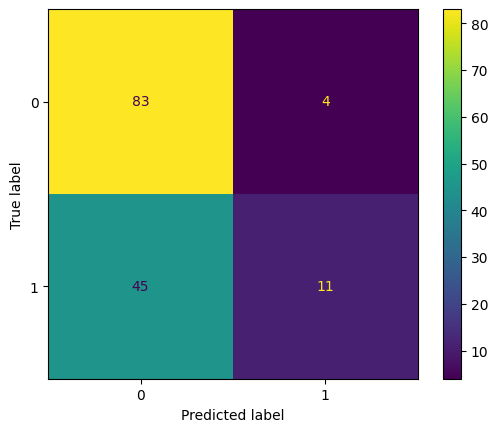

In [ ]:
import sklearn.metrics as metrics 
clf = model_logistic.fit(x_train,y_train)
cm = metrics.confusion_matrix(y_test,y_pred, labels= clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [57]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

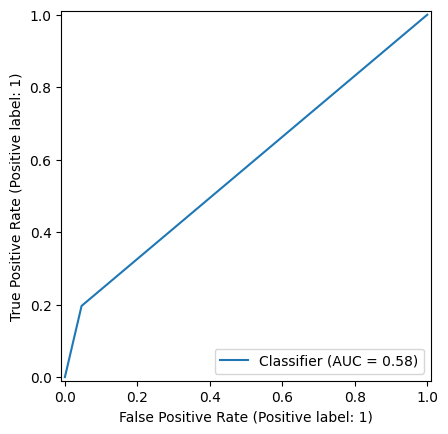

In [58]:
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

In [59]:
metrics.roc_auc_score(y_test,y_pred)

0.5752257799671593